# Predicting the Average Price of Avocado

Avocado is a fruit consumed by people heavily in the United States. 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the data
df=pd.read_csv('avocado.csv')

In [4]:
#cheking the shape of the data
df.shape

(16468, 14)

The dataset contains 16468 rows and 14 columns.

In [5]:
#Viewing first 10 rows of the dataset
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
5,5.0,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany
6,6.0,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany
7,7.0,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany
8,8.0,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany
9,9.0,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany


In [6]:
#Cheking column names
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Column description:

Unnamed:0    - Contains index
 
Date         - The date of the observation

AveragePrice - the average price of a single avocado (Target variable)

type         - conventional or organic

year         - the year

Region       - the city or region of the observation

Total Volume - Total number of avocados sold

4046         - Total number of avocados with PLU 4046 sold

4225         - Total number of avocados with PLU 4225 sold

4770         - Total number of avocados with PLU 4770 sold

Small Bags

Large Bags

XLarge Bags

Total Bags

In [7]:
#Lets check the data types
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

Date, type and region are of object type.

All remaing are of float type.

Date column should be of date type, lets convert its data type to date.

In [8]:
#Converting date column to data type- date
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [10]:
#Cheking for null values
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

All the columns have same number of null values (14951), it means that there is no data in those 14951 rows.

Lets remove the null values.

In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

All the null values are removed.

In [13]:
#Cheking the new shape of our dataset
df.shape

(1517, 14)

Now we have 1517 rows and 14 columns.

In [14]:
#viewing first 10 and last 10 rows of the dataset
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
5,5.0,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany
6,6.0,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany
7,7.0,2015-08-11,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany
8,8.0,2015-01-11,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany
9,9.0,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany


In [15]:
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1507,5.0,2016-11-20,1.57,135608.11,44044.69,28907.47,13913.04,48742.91,42721.62,6021.29,0.00,conventional,2016.0,Charlotte
1508,6.0,2016-11-13,1.64,144089.12,49399.39,26597.39,22714.68,45377.66,38436.79,6940.87,0.00,conventional,2016.0,Charlotte
1509,7.0,2016-06-11,1.57,142095.92,36840.74,27501.34,25305.86,52447.98,45861.67,6586.31,0.00,conventional,2016.0,Charlotte
1510,8.0,2016-10-30,1.58,142955.49,39376.44,29382.30,26881.22,47315.53,40258.68,6816.57,240.28,conventional,2016.0,Charlotte
1511,9.0,2016-10-23,1.52,167741.27,54981.90,39749.81,20290.31,52719.25,47060.46,5658.79,0.00,conventional,2016.0,Charlotte
1512,10.0,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,14.0,2016-09-18,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


As the 'unnamed:0' column doesn't provide any relevant  information, therefore we will remove it.

In [16]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [17]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [18]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,2016-09-18,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


# Visualization

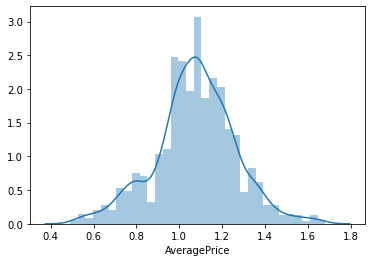

In [19]:
sns.distplot(df['AveragePrice'],kde=True)

In most of the observations the average price is between 0.95 to 1.2.

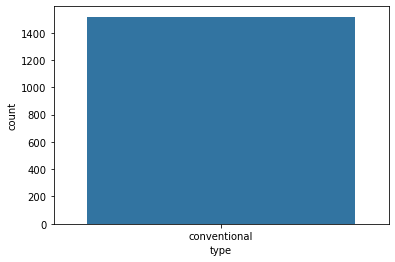

In [20]:
sns.countplot(df['type'])

We have only one type of avocados (conventional type),therefore we will be removing this column as it is the same for all the observations.

In [21]:
#removing the type column
df.drop(columns=['type'],axis=1,inplace=True)

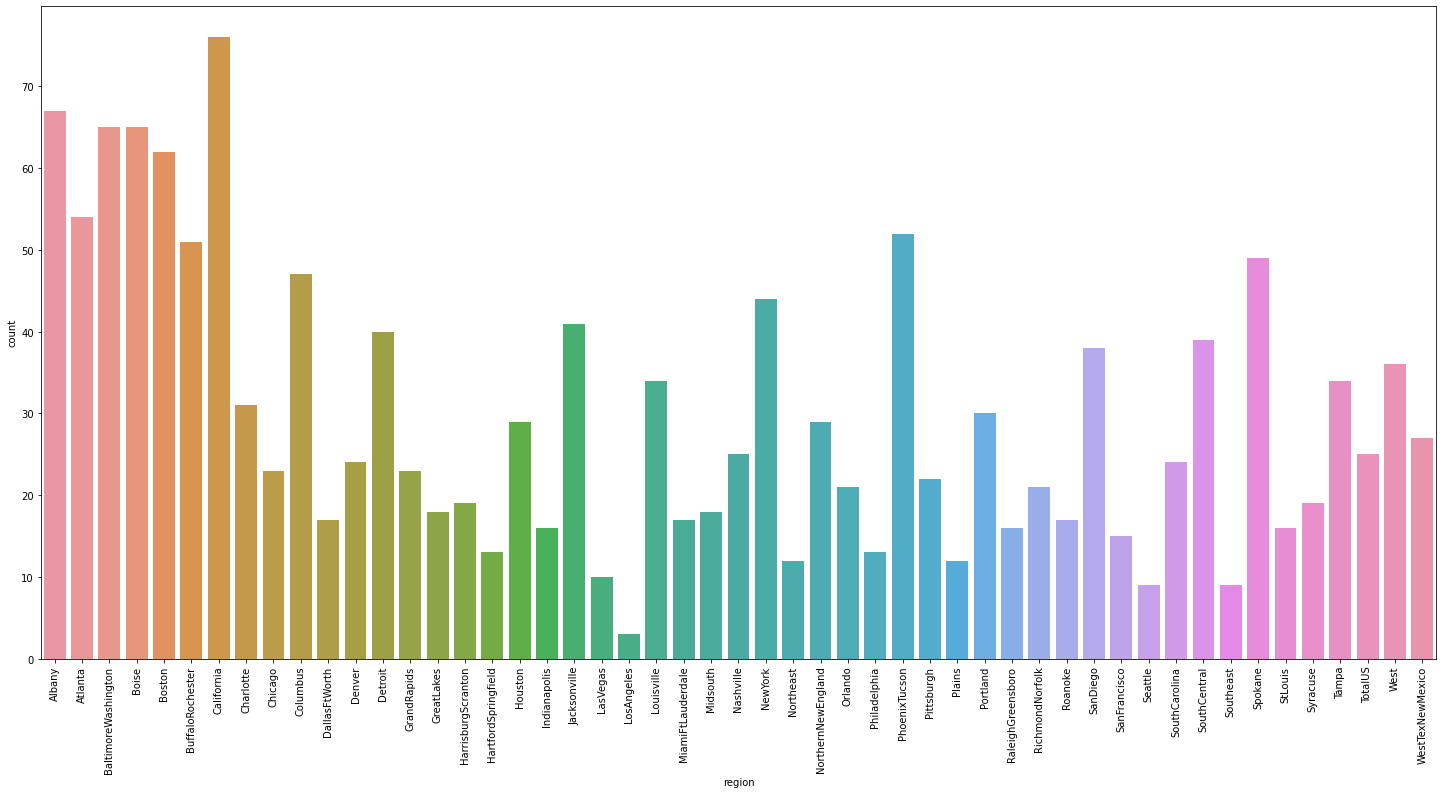

In [22]:
#cheking how many regions do we have 
plt.figure(figsize=[25,12])
sns.countplot(df['region'])
plt.xticks(rotation = 90)
plt.show()

Most of the observations are from California and least observations are from LosAngeles.

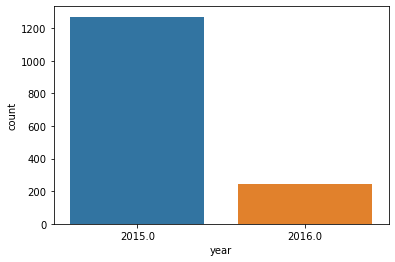

In [23]:
#Lets see how many years of data we have
sns.countplot(df.year)


In [24]:
df.year.value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

We have data from 2015 and 2016, most of the data is from the year 2015.

1270 observations are from the year 2015 and 247 are from the year 2016

As we have data from 2 years only, lets extract month and day from date column, to further analyse our data.

In [25]:
df['month']=df['Date'].apply(lambda x:x.month)
df['day']=df['Date'].apply(lambda x:x.day)

In [26]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11,29


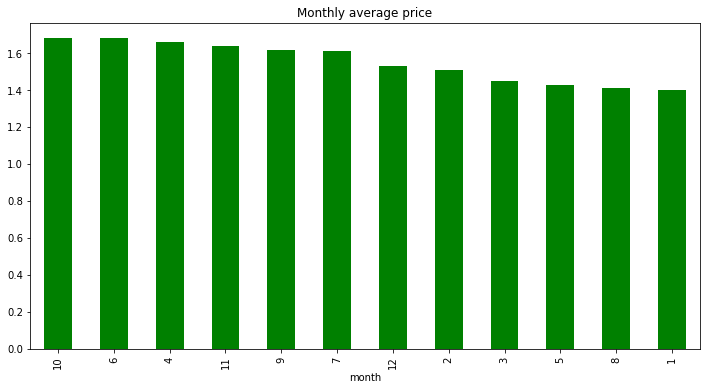

In [27]:
df.groupby('month')['AveragePrice'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Monthly average price')
plt.show()

The average price is highest in the 10th and 6th month.

The average price is lowest in 1st and 8th month.

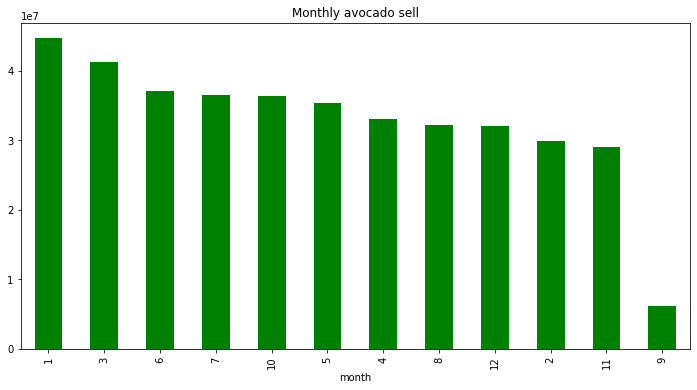

In [28]:
df.groupby('month')['Total Volume'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Monthly avocado sell')
plt.show()

In 1st month the sell is highest as the price is the lowest in that month.

In the 9th month the sell is the lowest.

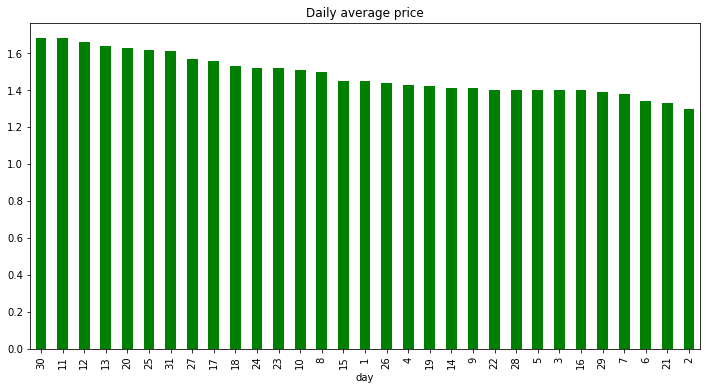

In [29]:
df.groupby('day')['AveragePrice'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Daily average price')
plt.show()

The daily average price is highest on 30th and 11th day of the month and lowest on 21st and 2nd day of the month

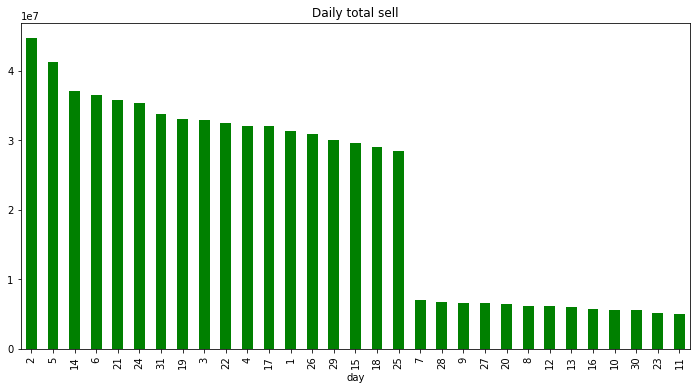

In [30]:
df.groupby('day')['Total Volume'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Daily total sell')
plt.show()

The sell is hifhest on 2nd day of the month as the average price is the lowest on this day.

The sell is lowest on 11th day of the month as the average price is higher on this day.

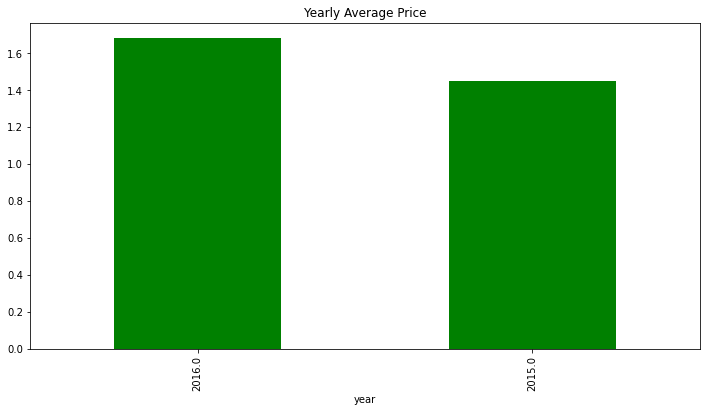

In [31]:
df.groupby('year')['AveragePrice'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Yearly Average Price')
plt.show()

The average price is high in 2016 than in 2015. The avergae price increased from the previous year.

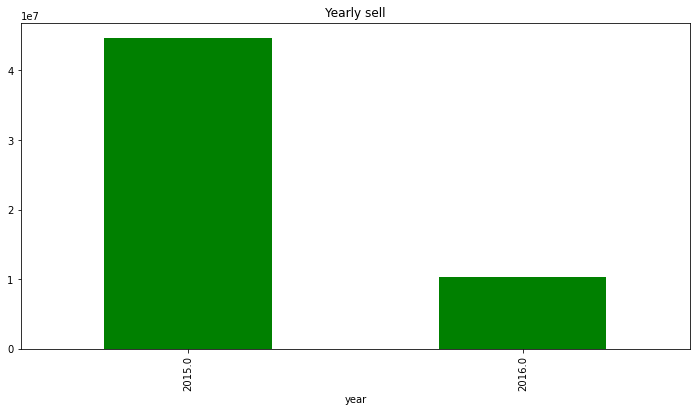

In [32]:
df.groupby('year')['Total Volume'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Yearly sell')
plt.show()

In 2015 the more avocados were sold than in 2016, it might be because in our data we have less number of observations from the year 2016 in comparison to 2015.

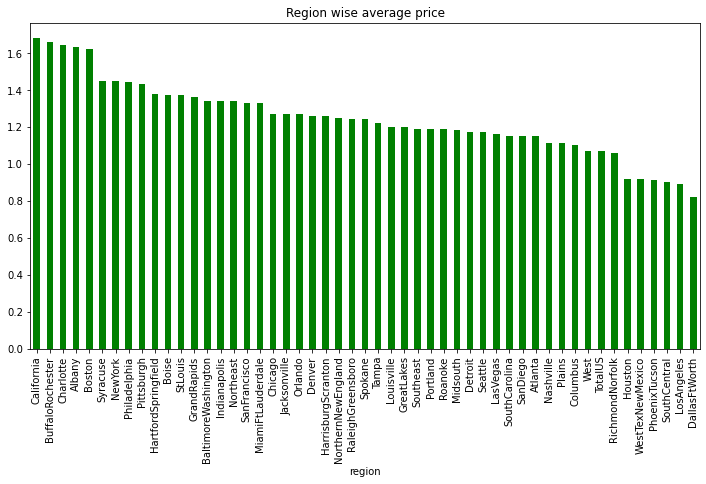

In [33]:
df.groupby('region')['AveragePrice'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Region wise average price')
plt.xticks(rotation = 90)
plt.show()

The average price is highest in California and the lowest in DallasFtWorth

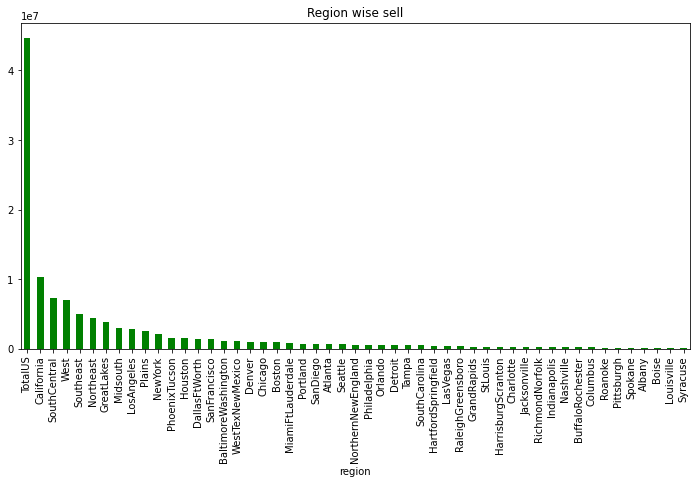

In [34]:
df.groupby('region')['Total Volume'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Region wise sell')
plt.xticks(rotation = 90)
plt.show()

California have the highest sell and Syracuse have the lowest sell.

People in California consumes more avocados than other states.

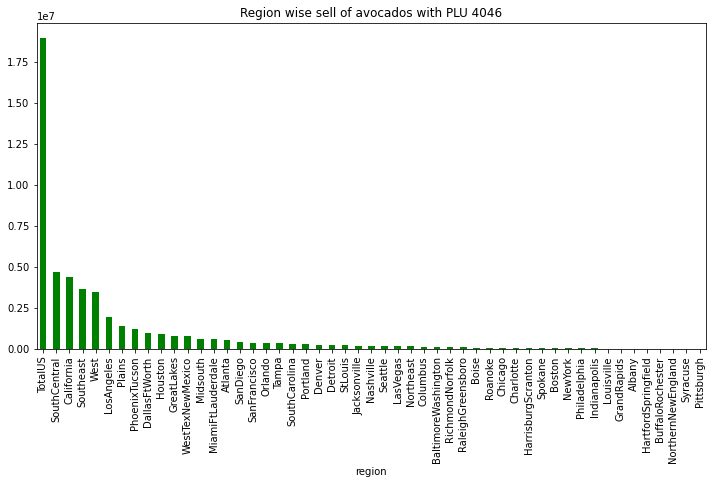

In [35]:
df.groupby('region')['4046'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Region wise sell of avocados with PLU 4046')
plt.xticks(rotation = 90)
plt.show()

Most of the avocados with PLU 4046 are sold in SouthCentral

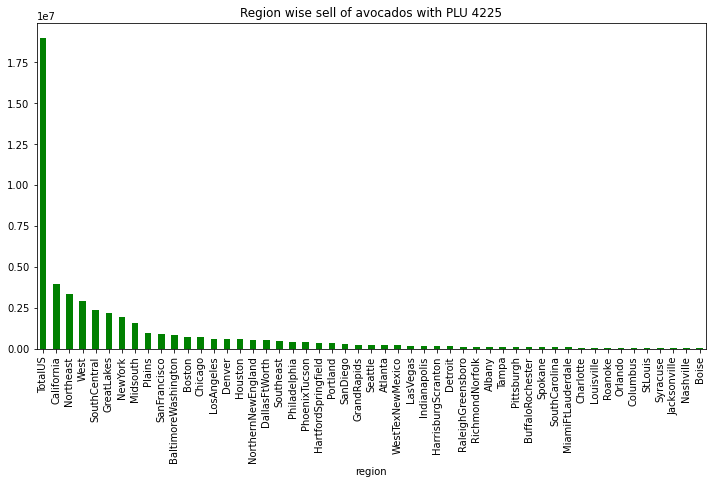

In [36]:
df.groupby('region')['4225'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Region wise sell of avocados with PLU 4225')
plt.xticks(rotation = 90)
plt.show()

Most of the avocados with PLU 4225 are sold in California.

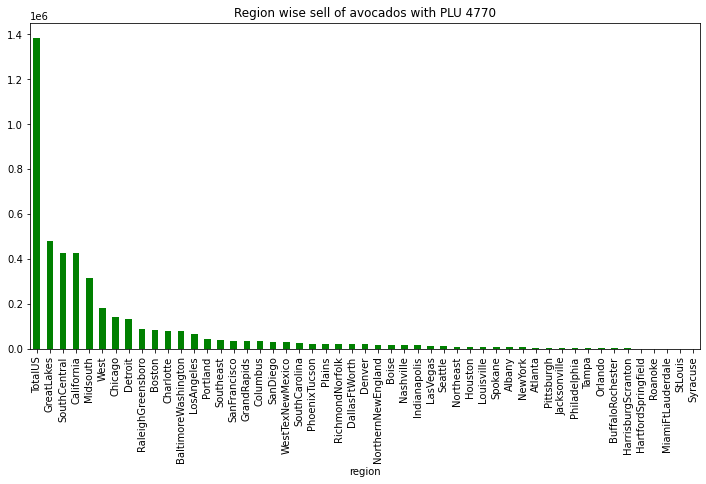

In [37]:
df.groupby('region')['4770'].max().sort_values(ascending=False).plot(kind='bar', figsize=(12,6),color='green')
plt.title('Region wise sell of avocados with PLU 4770')
plt.xticks(rotation = 90)
plt.show()

Most of the avocados with PLU 4770 are sold in GreatLakes.

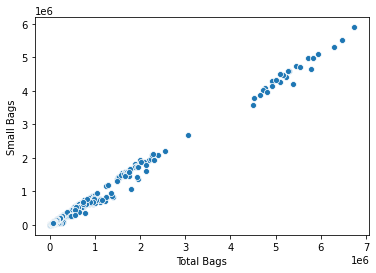

In [38]:
sns.scatterplot(x='Total Bags',y='Small Bags',data=df)

Total bags increases with increase in small bags.

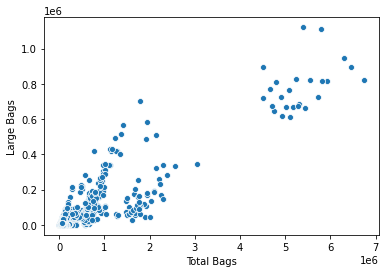

In [39]:
sns.scatterplot(x='Total Bags',y='Large Bags',data=df)

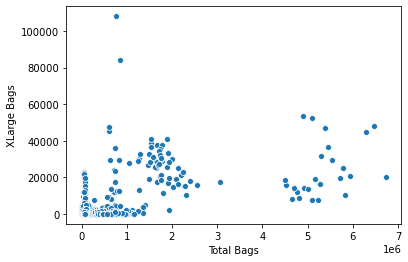

In [40]:
sns.scatterplot(x='Total Bags',y='XLarge Bags',data=df)

XLarge bags doesn't show any linear relation with Total bags.

In [41]:
#Describing the data
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


The minimum average price is 0.49 and maximun is 1.68

Outliers are present in our dataset as in some columns there is huge differnece between 75% and maximum value.

Skewness is present in few columns as there is differnce between mean and 50% value.

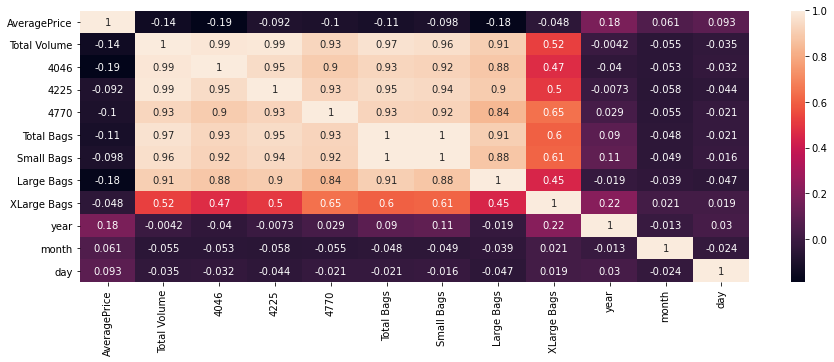

In [42]:
#Checking correlation
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

There is a strong positive correlation between total volume and 4046,4225,4770,total bags,small bags & large bags.

There is no strong correlation between target variable(AveragePrice) and independent variables.

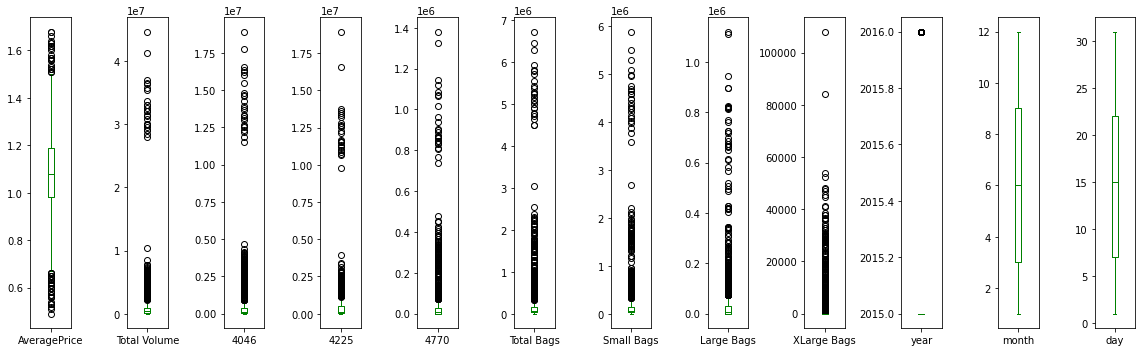

In [43]:
#Cheking Outliers
df.plot(kind='box',subplots=True,layout=(1,15),figsize=(20,5),color='green')
plt.tight_layout()

There are number of outliers present in our dataset.

In [44]:
#Checking outliers using z-score
from scipy.stats import zscore
zscr=np.abs(zscore(df.iloc[:,1:10]))
threshold=3
print(np.where(zscr>3))


(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [45]:
#Removing outliers
print('shape before removing the outliers:' , df.shape)
df_new=df[(zscr<3).all(axis=1)]
print('shape after removing outliers :', df_new.shape)

shape before removing the outliers: (1517, 14)
shape after removing outliers : (1436, 14)


In [46]:
print('data loss =',100-((1436/1517)*100))

data loss = 5.3394858272907015


Data loss is 5.33 % , therefore we can go for outlier removal.

In [47]:
df=df_new

In [48]:
df.shape

(1436, 14)

Now we have 1436 rows and 13 columns.

Checking distribution of the data:

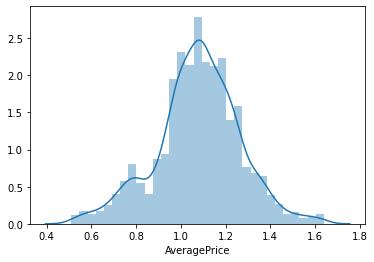

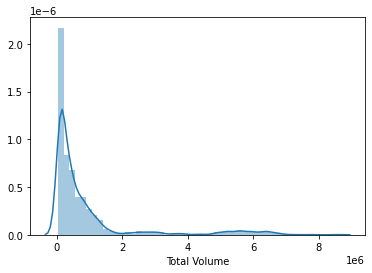

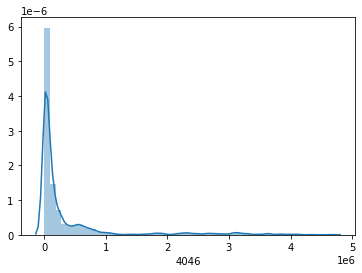

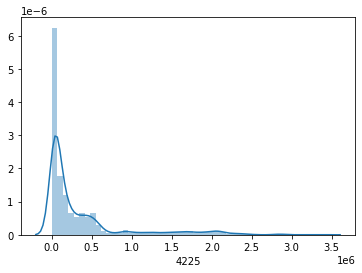

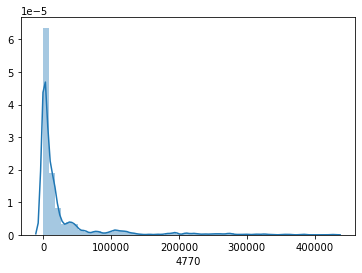

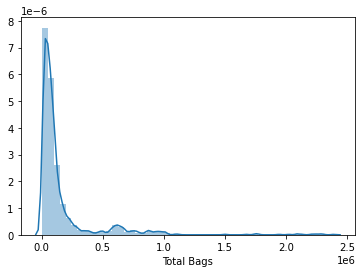

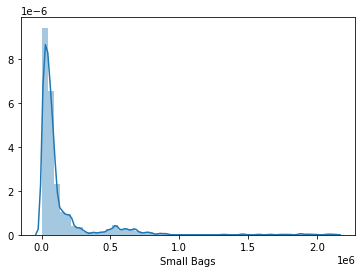

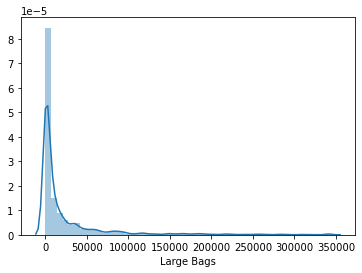

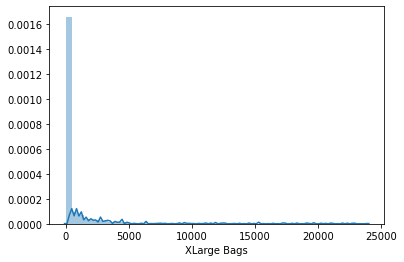

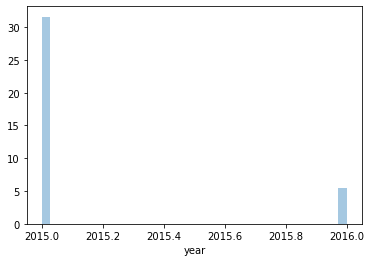

In [49]:
for i in df.columns:
    if df[i].dtypes==float or df[i].dtypes==int:
        plt.figure()
        sns.distplot(df[i],kde=True)
        plt.show()

Average price have normal distribution.

Rest of the columns are left skewed.

In [50]:
#Droppping date column as we have day, month and year separately.
df.drop(columns='Date',axis=1,inplace=True)

In [51]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11,29


In [52]:
#Separating the target variable and independent varibale into x and y

x=df.iloc[:,1:]
y=df.iloc[:,0]

In [53]:
#coverting year from float to int
x['year']=x['year'].astype(int)


In [54]:
#Checking skewness
x.skew()

Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
month           0.111898
day             0.041849
dtype: float64

Keeping +/- 0.5 as the range for skewness, all columns have skewness(year will be excluded because we have only 2 years).

In [55]:
#removing skewness
for i in x.columns:
    if x[i].dtypes==float:
        x[i]=np.log1p(x[i])

In [56]:
x.skew()

Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
year            2.004439
month           0.111898
day             0.041849
dtype: float64

In [57]:
#converting region from string to numerical using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['region'] = le.fit_transform(x['region'])

In [58]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,0,12,27
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,0,12,20
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,0,12,13
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,0,6,12
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,0,11,29


In [59]:
#Scaling the independent variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)
df_x=pd.DataFrame(df_x,columns=x.columns)

In [60]:
x=df_x

In [61]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,-1.410935,-1.847345,-0.507917,-1.815979,-1.822359,-1.648547,-0.917419,-0.775528,-0.41387,-1.325962,1.637005,1.308085
1,-1.535660,-2.042823,-0.635183,-1.739119,-1.746806,-1.573622,-0.904196,-0.775528,-0.41387,-1.325962,1.637005,0.528523
2,-0.927830,-1.968169,-0.062698,-1.413794,-1.878029,-1.705109,-0.887434,-0.775528,-0.41387,-1.325962,1.637005,-0.251039
3,-1.247168,-1.807390,-0.329300,-1.651131,-2.164946,-1.996977,-0.809976,-0.775528,-0.41387,-1.325962,-0.096578,-0.362405
4,-1.593074,-1.891150,-0.646768,-1.633730,-2.112115,-1.952576,-0.693305,-0.775528,-0.41387,-1.325962,1.348074,1.530817


In [62]:
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Finding the best random state:

In [63]:
lr=LinearRegression()
maxr2=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxr2:
        maxr2=r2
        maxrs=i
print('Best r2_score is',maxr2,'on random state', maxrs)

Best r2_score is 0.4786434129133461 on random state 115


In [86]:
#Spliting train and test data at random state 115
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=115)

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [73]:
ls=Lasso()
rd=Ridge()
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()

In [74]:
model=[lr,ls,rd,svr,knn,rf,ada]

for i in model:
    print('\n')
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    score=i.score(x_train,y_train)
    print('score:',score)
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score:',r2_score(y_test,pred))



LinearRegression()
score: 0.3792453008883717
mean absolute error: 0.10881925751438877
Root mean squared error: 0.14454187582539407
r2_score: 0.4786434129133461


Lasso()
score: 0.0
mean absolute error: 0.15101541327913282
Root mean squared error: 0.20058452871007415
r2_score: -0.004019983009336148


Ridge()
score: 0.37912045369091285
mean absolute error: 0.10896707227204366
Root mean squared error: 0.14479109429170067
r2_score: 0.4768440215312538


SVR()
score: 0.8109939627005978
mean absolute error: 0.07552842446324215
Root mean squared error: 0.09664645811990913
r2_score: 0.7669122888244699


KNeighborsRegressor()
score: 0.8047480522120646
mean absolute error: 0.07704861111111111
Root mean squared error: 0.10001923426132706
r2_score: 0.7503597881461628


RandomForestRegressor()
score: 0.9726118128431993
mean absolute error: 0.059383680555555554
Root mean squared error: 0.08051472928566826
r2_score: 0.8382299327830608


AdaBoostRegressor()
score: 0.6420174778941268
mean absolute err

Random Forest Regressor model is performing well with r2_score of 83%, MAE- 0.05 and RMSE- 0.08.

# Hyper parameter tuning:

In [69]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt']}
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [87]:
rf=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,pred_rf))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_rf)))
print('R2 score is:',r2_score(y_test,pred_rf))

mean absolute error: 0.0581753472222222
Root mean squared error: 0.07797321232498874
R2 score is: 0.8482815682281702


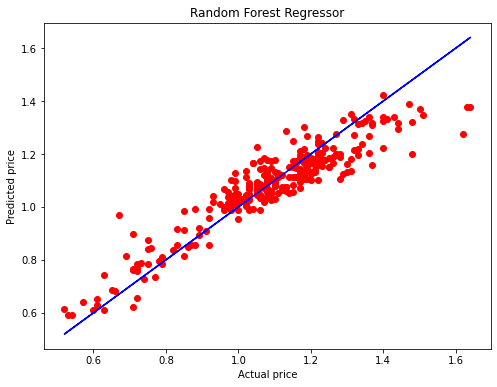

In [89]:
#ploting our model
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rf, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Random Forest Regressor')
plt.show()

Our final model has an r2 score of 84.8% , MAE- 0.05 and RMSE- 0.07 

In [88]:
#Saving our model
import joblib
joblib.dump(rf,'Avocado_Price_Prediction_rf.obj')

['Avocado_Price_Prediction_rf.obj']